In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() # Sets up Seaborn default styles

## Data Import

In [3]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('../data/covid_lies.csv')

In [4]:
# Keys are misconception IDs, values are the misconception in English
misonception_map = pd.Series(df.misconception.values, index = df.misconception_id).to_dict()

## Segmented DataFrames

In [22]:
# Dataframe of (tweet, misconception) pairs that either agree with (pos), reject (neg), or take no stance (na) towards the misconception
pos = df[df.label == 'pos']
neg = df[df.label == 'neg']
na = df[df.label == 'na']
# Prints number of rows in each dataframe
df.label.value_counts()

na     6149
pos     288
neg     154
Name: label, dtype: int64

In [24]:
# Counts the number of times a tweet appears in a (tweet, misconception) pair
sorted_tweet_ids  = df.groupby('tweet_id').tweet.count().sort_values(ascending = False)
print(f"There are {len(sorted_tweet_ids)} unique tweets")

There are 4371 unique tweets


### Stance Distribution by Misconception

<AxesSubplot:xlabel='misconception_id', ylabel='count'>

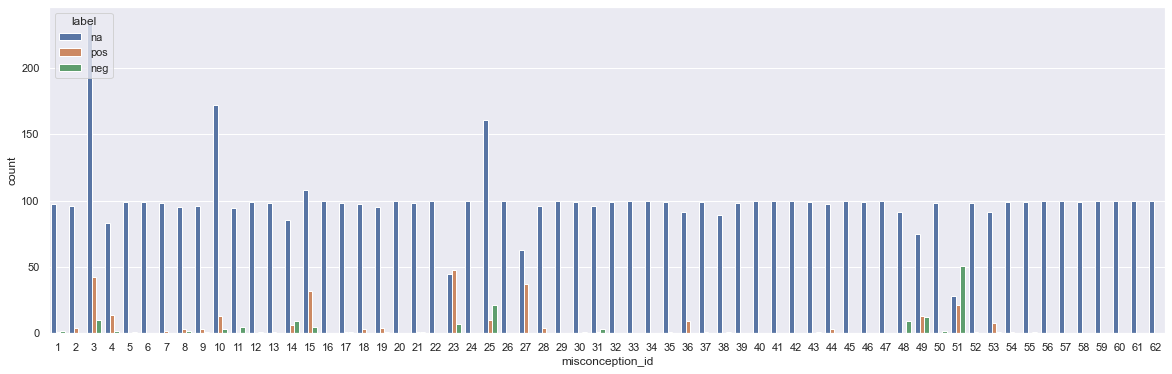

In [25]:
# Sets the size of the figure to be wider
plt.figure(figsize = (20, 6))
sns.countplot(x = 'misconception_id', data = df, hue = 'label')

In [26]:
print(f"Misconception 51 is {misonception_map[51]}")
# Get all rows where the misconception ID is 51
df[df.misconception_id == 51]

Misconception 51 is COVID-19 is only as deadly as the seasonal flu.


,misconception_id,misconception,tweet,tweet_id,label
143,51,COVID-19 is only as deadly as the seasonal flu.,"“Most people (not elderly, no underlying healt...",1233920123183828992,na
169,51,COVID-19 is only as deadly as the seasonal flu.,"@USERNAME Save your comments, ie sharpie/weath...",1233953724025884672,pos
188,51,COVID-19 is only as deadly as the seasonal flu.,"@USERNAME @USERNAME Closer to 650,000 people w...",1233933151682121728,neg
471,51,COVID-19 is only as deadly as the seasonal flu.,Covid-19 is about 43 times more deadly if you ...,1233939769475751936,neg
521,51,COVID-19 is only as deadly as the seasonal flu.,@USERNAME @USERNAME @USERNAME @USERNAME Part t...,1233981832078729216,neg
...,...,...,...,...,...
6212,51,COVID-19 is only as deadly as the seasonal flu.,Everything you said is true plus 1 more thing....,1233942018264633344,pos
6217,51,COVID-19 is only as deadly as the seasonal flu.,New research suggests COVID-19 is 20 times mor...,1233982133305139200,neg
6251,51,COVID-19 is only as deadly as the seasonal flu.,9/13 Could be problematic if breaks out among ...,1233954373421740032,pos
6383,51,COVID-19 is only as deadly as the seasonal flu.,@USERNAME @USERNAME @USERNAME @USERNAME If COV...,1233928499846696960,neg
